<center>
<img src="https://i.imgur.com/FMnmJeU.png"/>

# **Desafio Laboratório BigMAAp - Previsão de Temperatura por Meio de Regressão Linear em Séries Temporais**

</center>

O objetivo deste desafio foi coletar dados de temperatura de uma API pública, realizar a limpeza e tratamento desses dados, gerar um modelo de regressão linear e realizar a predição de valores de temperatura para uma semana, comparando com os dados reais para medir a precisão do modelo.



## **Obtenção dos dados**

Os dados da série temporal de temperaturas foram obtidos por meio da API [Open-Meteo](https://open-meteo.com/en/docs/historical-weather-api). Foram utilizados os dados históricos da cidade de Sorocaba - SP, coletados de hora em hora.

In [268]:
import requests

# Definindo a cidade de obtenção dos dados
latitude = -23.50
longitude = -47.46

# Definindo as features de interesse
start_date = "1940-01-01"
end_date = "2023-04-08"
vars = 'temperature_2m,relativehumidity_2m,dewpoint_2m,pressure_msl,surface_pressure,rain,cloudcover,cloudcover_low,cloudcover_mid,cloudcover_high,shortwave_radiation,direct_radiation,diffuse_radiation,direct_normal_irradiance,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,et0_fao_evapotranspiration,vapor_pressure_deficit,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm'

# Fazendo a requisição de dados
url = f'https://archive-api.open-meteo.com/v1/archive?latitude={latitude}&longitude={longitude}&start_date={start_date}&end_date={end_date}&hourly={vars}'
response = requests.get(url)

# Verificando se a requisição foi bem sucedida
if response.status_code == 200:
    # Convertendo a resposta em um objeto JSON
    data = response.json()
    print('Requisição bem sucedida!')
else:
    print(f'Erro na requisição: {response.status_code}')

Requisição bem sucedida!


Em seguida, o objeto JSON foi convertido em um dataframe:

In [269]:
import pandas as pd

# Criando o DataFrame
temperature_data = pd.DataFrame(data['hourly'])

# Renomeando as colunas
temperature_data = temperature_data.rename(columns={'time':'Data/Hora',
            'temperature_2m':'temperatura (°C)',
            'relativehumidity_2m':'umidade_relativa (%)',
            'dewpoint_2m':'ponto_de_orvalho (°C)',
            'pressure_msl':'pressão_nível_mar (hPa)',
            'surface_pressure':'pressão_superfície (hPa)',
            'rain':'chuva (mm)',
            'cloudcover': 'cobertura_nuvens (%)',
            'cloudcover_low': 'cobertura_nuvens_baixo (%)',
            'cloudcover_mid': 'cobertura_nuvens_meio (%)',
            'cloudcover_high': 'cobertura_nuvens_alto (%)',
            'shortwave_radiation': 'radiação_ondas_curtas (W/m²)',
            'direct_radiation': 'radiação_direta (W/m²)',
            'diffuse_radiation': 'radiação_difusa (W/m²)',
            'direct_normal_irradiance': 'irradiância_normal_direta (W/m²)',
            'windspeed_10m': 'velocidade_vento_10m (km/h)',
            'windspeed_100m': 'velocidade_vento_100m (km/h)',
            'winddirection_10m': 'direção_vento_10m (°)',
            'winddirection_100m': 'direção_vento_100m (°)',
            'windgusts_10m': 'rajada_vento_10m (km/h)',
            'et0_fao_evapotranspiration': 'evapotranspiração (mm)',
            'vapor_pressure_deficit': 'déficit_pressão_vapor (kPa)',
            'soil_temperature_0_to_7cm': 'temperatura_solo_0_a_7cm (°C)',
            'soil_temperature_7_to_28cm': 'temperatura_solo_7_a_28cm (°C)',
            'soil_temperature_28_to_100cm': 'temperatura_solo_28_a_100cm (°C)',
            'soil_temperature_100_to_255cm': 'temperatura_solo_100_a_255cm (°C)',
            'soil_moisture_0_to_7cm': 'umidade_solo_0_a_7cm (m³/m³)',
            'soil_moisture_7_to_28cm': 'umidade_solo_7_a_28cm (m³/m³)',
            'soil_moisture_28_to_100cm': 'umidade_solo_28_a_100cm (m³/m³)',
            'soil_moisture_100_to_255cm': 'umidade_solo_100_a_255cm (m³/m³)'})

temperature_data.set_index('Data/Hora', inplace=True)

Visualizando o dataframe obtido:



In [270]:
temperature_data.head(5)

,temperatura (°C),umidade_relativa (%),ponto_de_orvalho (°C),pressão_nível_mar (hPa),pressão_superfície (hPa),chuva (mm),cobertura_nuvens (%),cobertura_nuvens_baixo (%),cobertura_nuvens_meio (%),cobertura_nuvens_alto (%),...,evapotranspiração (mm),déficit_pressão_vapor (kPa),temperatura_solo_0_a_7cm (°C),temperatura_solo_7_a_28cm (°C),temperatura_solo_28_a_100cm (°C),temperatura_solo_100_a_255cm (°C),umidade_solo_0_a_7cm (m³/m³),umidade_solo_7_a_28cm (m³/m³),umidade_solo_28_a_100cm (m³/m³),umidade_solo_100_a_255cm (m³/m³)
Data/Hora,,,,,,,,,,,,,,,,,,,,,
1940-01-01T00:00,17.4,93,16.2,1015.0,944.3,NaN,61,34,9,83,...,NaN,0.15,18.3,19.4,20.7,20.0,0.477,0.484,0.489,0.462
1940-01-01T-23:00,17.2,94,16.1,1015.7,944.9,NaN,71,41,13,88,...,NaN,0.13,18.1,19.4,20.7,20.0,0.475,0.482,0.489,0.463
1940-01-01T-22:00,17.2,94,16.1,1015.6,944.8,NaN,78,51,10,86,...,NaN,0.13,17.9,19.3,20.7,20.0,0.473,0.481,0.489,0.463
1940-01-01T-21:00,17.1,94,16.1,1015.4,944.6,NaN,100,66,47,93,...,NaN,0.12,17.8,19.2,20.7,20.0,0.472,0.479,0.489,0.463
1940-01-01T-20:00,17.1,94,16.0,1014.8,944.1,NaN,100,97,94,94,...,NaN,0.13,17.7,19.2,20.7,20.0,0.470,0.478,0.488,0.463


Obtendo informações do conjunto de dados, como a quantidade e o tipo das variáveis, se há valores nulos, a escala dos dados e se há colunas com valores repetidos:

In [271]:
temperature_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 729936 entries, 1940-01-01T00:00 to 2023-04-08T23:00
Data columns (total 29 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   temperatura (°C)                   729936 non-null  float64
 1   umidade_relativa (%)               729936 non-null  int64  
 2   ponto_de_orvalho (°C)              729936 non-null  float64
 3   pressão_nível_mar (hPa)            729936 non-null  float64
 4   pressão_superfície (hPa)           729936 non-null  float64
 5   chuva (mm)                         729929 non-null  float64
 6   cobertura_nuvens (%)               729936 non-null  int64  
 7   cobertura_nuvens_baixo (%)         729936 non-null  int64  
 8   cobertura_nuvens_meio (%)          729936 non-null  int64  
 9   cobertura_nuvens_alto (%)          729936 non-null  int64  
 10  radiação_ondas_curtas (W/m²)       729929 non-null  float64
 11  radiação_direta (W/

In [272]:
temperature_data.describe()

,temperatura (°C),umidade_relativa (%),ponto_de_orvalho (°C),pressão_nível_mar (hPa),pressão_superfície (hPa),chuva (mm),cobertura_nuvens (%),cobertura_nuvens_baixo (%),cobertura_nuvens_meio (%),cobertura_nuvens_alto (%),...,evapotranspiração (mm),déficit_pressão_vapor (kPa),temperatura_solo_0_a_7cm (°C),temperatura_solo_7_a_28cm (°C),temperatura_solo_28_a_100cm (°C),temperatura_solo_100_a_255cm (°C),umidade_solo_0_a_7cm (m³/m³),umidade_solo_7_a_28cm (m³/m³),umidade_solo_28_a_100cm (m³/m³),umidade_solo_100_a_255cm (m³/m³)
count,729936.000000,729936.000000,729936.000000,729936.000000,729936.000000,729929.000000,729936.000000,729936.00000,729936.000000,729936.000000,...,729929.000000,729936.000000,729936.000000,729936.000000,729936.000000,729936.000000,729936.000000,729936.000000,729936.000000,729936.000000
mean,20.176349,77.702726,15.667152,1015.603777,945.519176,0.139502,46.528187,29.47858,20.765929,38.145713,...,0.144771,0.622718,21.141183,21.122736,21.105833,21.090904,0.342238,0.342394,0.333714,0.364344
std,4.608219,16.927132,3.864895,4.282355,3.543388,0.545752,34.161287,33.04570,27.445735,41.785066,...,0.193065,0.631821,4.475969,3.008987,2.257395,1.628704,0.081967,0.073487,0.068078,0.052259
min,0.500000,8.000000,-6.200000,994.700000,926.400000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,4.400000,10.000000,14.500000,16.700000,0.177000,0.211000,0.216000,0.236000
25%,17.000000,67.000000,13.000000,1012.600000,943.100000,0.000000,16.000000,2.00000,0.000000,0.000000,...,0.000000,0.170000,18.000000,18.900000,19.300000,19.800000,0.278000,0.281000,0.278000,0.336000
50%,20.100000,82.000000,16.000000,1015.300000,945.400000,0.000000,41.000000,15.00000,9.000000,15.000000,...,0.030000,0.380000,21.100000,21.400000,21.400000,21.200000,0.355000,0.348000,0.331000,0.365000
75%,23.300000,92.000000,18.900000,1018.400000,947.800000,0.000000,77.000000,49.00000,30.000000,88.000000,...,0.260000,0.900000,23.900000,23.400000,22.900000,22.400000,0.411000,0.403000,0.388000,0.398000
max,38.900000,100.000000,25.800000,1033.300000,961.100000,24.700000,100.000000,100.00000,100.000000,100.000000,...,0.960000,6.350000,44.200000,33.900000,29.000000,25.000000,0.495000,0.494000,0.493000,0.490000


## **Preparando os dados**

Importando bibliotecas e módulos necessários para a análise:

In [273]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from math import sqrt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import RANSACRegressor
import warnings
warnings.filterwarnings("ignore")




Quantificando valores faltantes em cada coluna do dataframe:

In [274]:
temperature_data.isnull().sum()

temperatura (°C)                     0
umidade_relativa (%)                 0
ponto_de_orvalho (°C)                0
pressão_nível_mar (hPa)              0
pressão_superfície (hPa)             0
chuva (mm)                           7
cobertura_nuvens (%)                 0
cobertura_nuvens_baixo (%)           0
cobertura_nuvens_meio (%)            0
cobertura_nuvens_alto (%)            0
radiação_ondas_curtas (W/m²)         7
radiação_direta (W/m²)               7
radiação_difusa (W/m²)               7
irradiância_normal_direta (W/m²)     8
velocidade_vento_10m (km/h)          0
velocidade_vento_100m (km/h)         0
direção_vento_10m (°)                0
direção_vento_100m (°)               0
rajada_vento_10m (km/h)              7
evapotranspiração (mm)               7
déficit_pressão_vapor (kPa)          0
temperatura_solo_0_a_7cm (°C)        0
temperatura_solo_7_a_28cm (°C)       0
temperatura_solo_28_a_100cm (°C)     0
temperatura_solo_100_a_255cm (°C)    0
umidade_solo_0_a_7cm (m³/

In [275]:
missing_values = (temperature_data.isnull().sum())
print(f"Linhas com valores ausentes: {missing_values.sum()}")

Linhas com valores ausentes: 50


Como há poucos valores ausentes no universo de 729936 linhas, optei por remover as linhas com valores faltantes:

In [276]:
dataframe_no_null = temperature_data.dropna()

Checando se realmente as linhas foram removidas:

In [277]:
print(f"Shape do dataframe 'temperature_data': {temperature_data.shape}")

print(f"Shape do dataframe 'dataframe_no_null': {dataframe_no_null.shape}")

dataframe_no_null.isnull().sum()

Shape do dataframe 'temperature_data': (729936, 29)
Shape do dataframe 'dataframe_no_null': (729928, 29)


temperatura (°C)                     0
umidade_relativa (%)                 0
ponto_de_orvalho (°C)                0
pressão_nível_mar (hPa)              0
pressão_superfície (hPa)             0
chuva (mm)                           0
cobertura_nuvens (%)                 0
cobertura_nuvens_baixo (%)           0
cobertura_nuvens_meio (%)            0
cobertura_nuvens_alto (%)            0
radiação_ondas_curtas (W/m²)         0
radiação_direta (W/m²)               0
radiação_difusa (W/m²)               0
irradiância_normal_direta (W/m²)     0
velocidade_vento_10m (km/h)          0
velocidade_vento_100m (km/h)         0
direção_vento_10m (°)                0
direção_vento_100m (°)               0
rajada_vento_10m (km/h)              0
evapotranspiração (mm)               0
déficit_pressão_vapor (kPa)          0
temperatura_solo_0_a_7cm (°C)        0
temperatura_solo_7_a_28cm (°C)       0
temperatura_solo_28_a_100cm (°C)     0
temperatura_solo_100_a_255cm (°C)    0
umidade_solo_0_a_7cm (m³/

Verificando a existência de outliers nos dados de cada feature utilizando gráficos box plot:

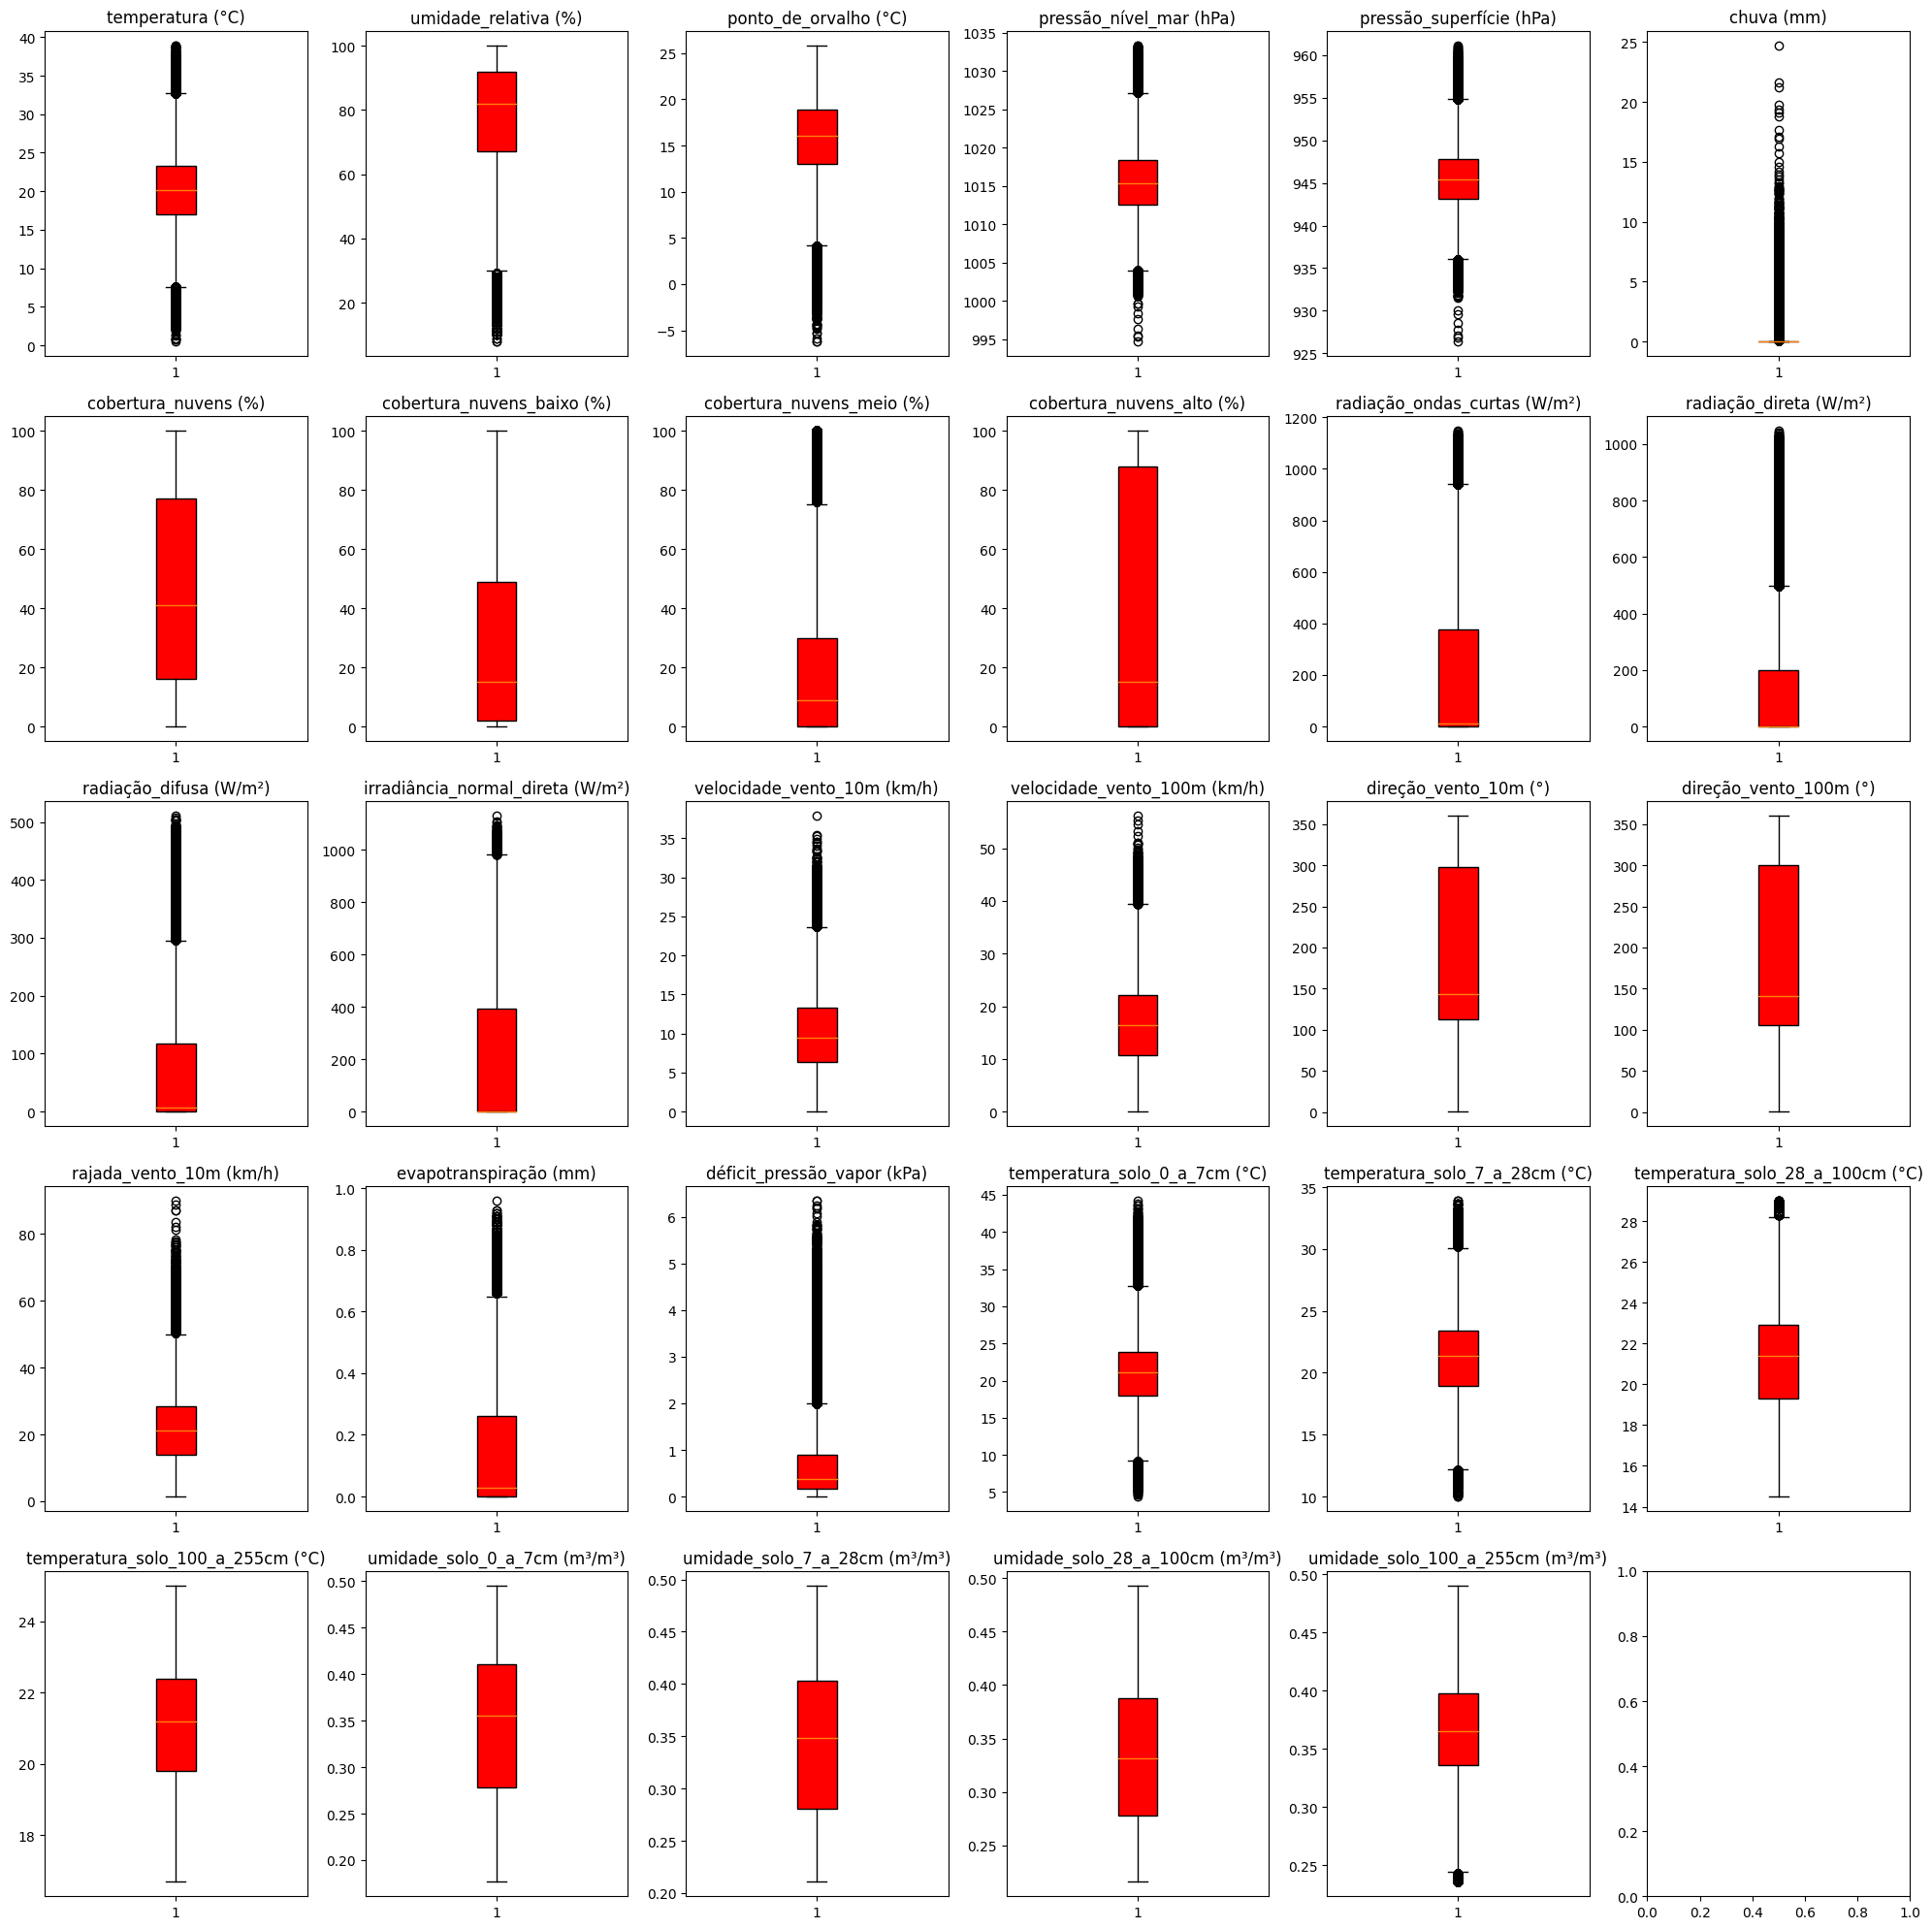

In [278]:
# Criando figura com 29 subplots
fig, axs = plt.subplots(5, 6, figsize=(20, 20))

# Plotando box plot de cada coluna em seu respectivo subplot
for i, col in enumerate(dataframe_no_null.columns):
    box = axs[i // 6, i % 6].boxplot(dataframe_no_null[col], patch_artist=True)
    for patch in box['boxes']:
        patch.set_facecolor('red')
    axs[i // 6, i % 6].set_title(col)

# Ajustando espaçamento entre os subplots
plt.tight_layout()

# Exibindo os gráficos
plt.show()

Removendo os outliers, usando 0,05 e 0,95 como limites inferior e superior, respectivamente:

In [279]:
# Definindo o limite inferior e superior, respectivamente
limit = [0.05, 0.95]

# Atribuindo os limites para cada coluna, em um dicionário
limits = {
    'temperatura (°C)': limit,
    'umidade_relativa (%)': limit,
    'ponto_de_orvalho (°C)': limit,
    'pressão_nível_mar (hPa)': limit,
    'pressão_superfície (hPa)': limit,
    'chuva (mm)': limit,
    'cobertura_nuvens_meio (%)': limit,
    'radiação_ondas_curtas (W/m²)': limit,
    'radiação_direta (W/m²)': limit,
    'radiação_difusa (W/m²)': limit,
    'irradiância_normal_direta (W/m²)': limit,
    'velocidade_vento_10m (km/h)': limit,
    'velocidade_vento_100m (km/h)': limit,
    'rajada_vento_10m (km/h)': limit,
    'evapotranspiração (mm)': limit,
    'déficit_pressão_vapor (kPa)': limit,
    'temperatura_solo_0_a_7cm (°C)': limit,
    'temperatura_solo_7_a_28cm (°C)': limit,
    'temperatura_solo_28_a_100cm (°C)': limit,
    'umidade_solo_100_a_255cm (m³/m³)': limit,
}

def remove_outliers(df, limits):
    # Criando uma cópia do dataFrame
    df_selected = df.copy()

    # Iterando sobre as colunas e aplicando a máscara booleana para identificar os valores que estão fora dos limites de corte
    for col, (lim_inf, lim_sup) in limits.items():
        mask = (df_selected[col] > df_selected[col].quantile(lim_sup)) | (df_selected[col] < df_selected[col].quantile(lim_inf))
        df_selected = df_selected.loc[~mask]

    return df_selected

# Removendo os outliers do dataframe
dataframe_no_outliers = remove_outliers(dataframe_no_null, limits)

print(f"Shape of the dataframe before removing outliers : {dataframe_no_null.shape}")
print(f"Shape of the dataframe after removing outliers : {dataframe_no_outliers.shape}")



Shape of the dataframe before removing outliers : (729928, 29)
Shape of the dataframe after removing outliers : (141502, 29)


Verificando se os outliers foram removidos plotando os gráficos box plot novamente:

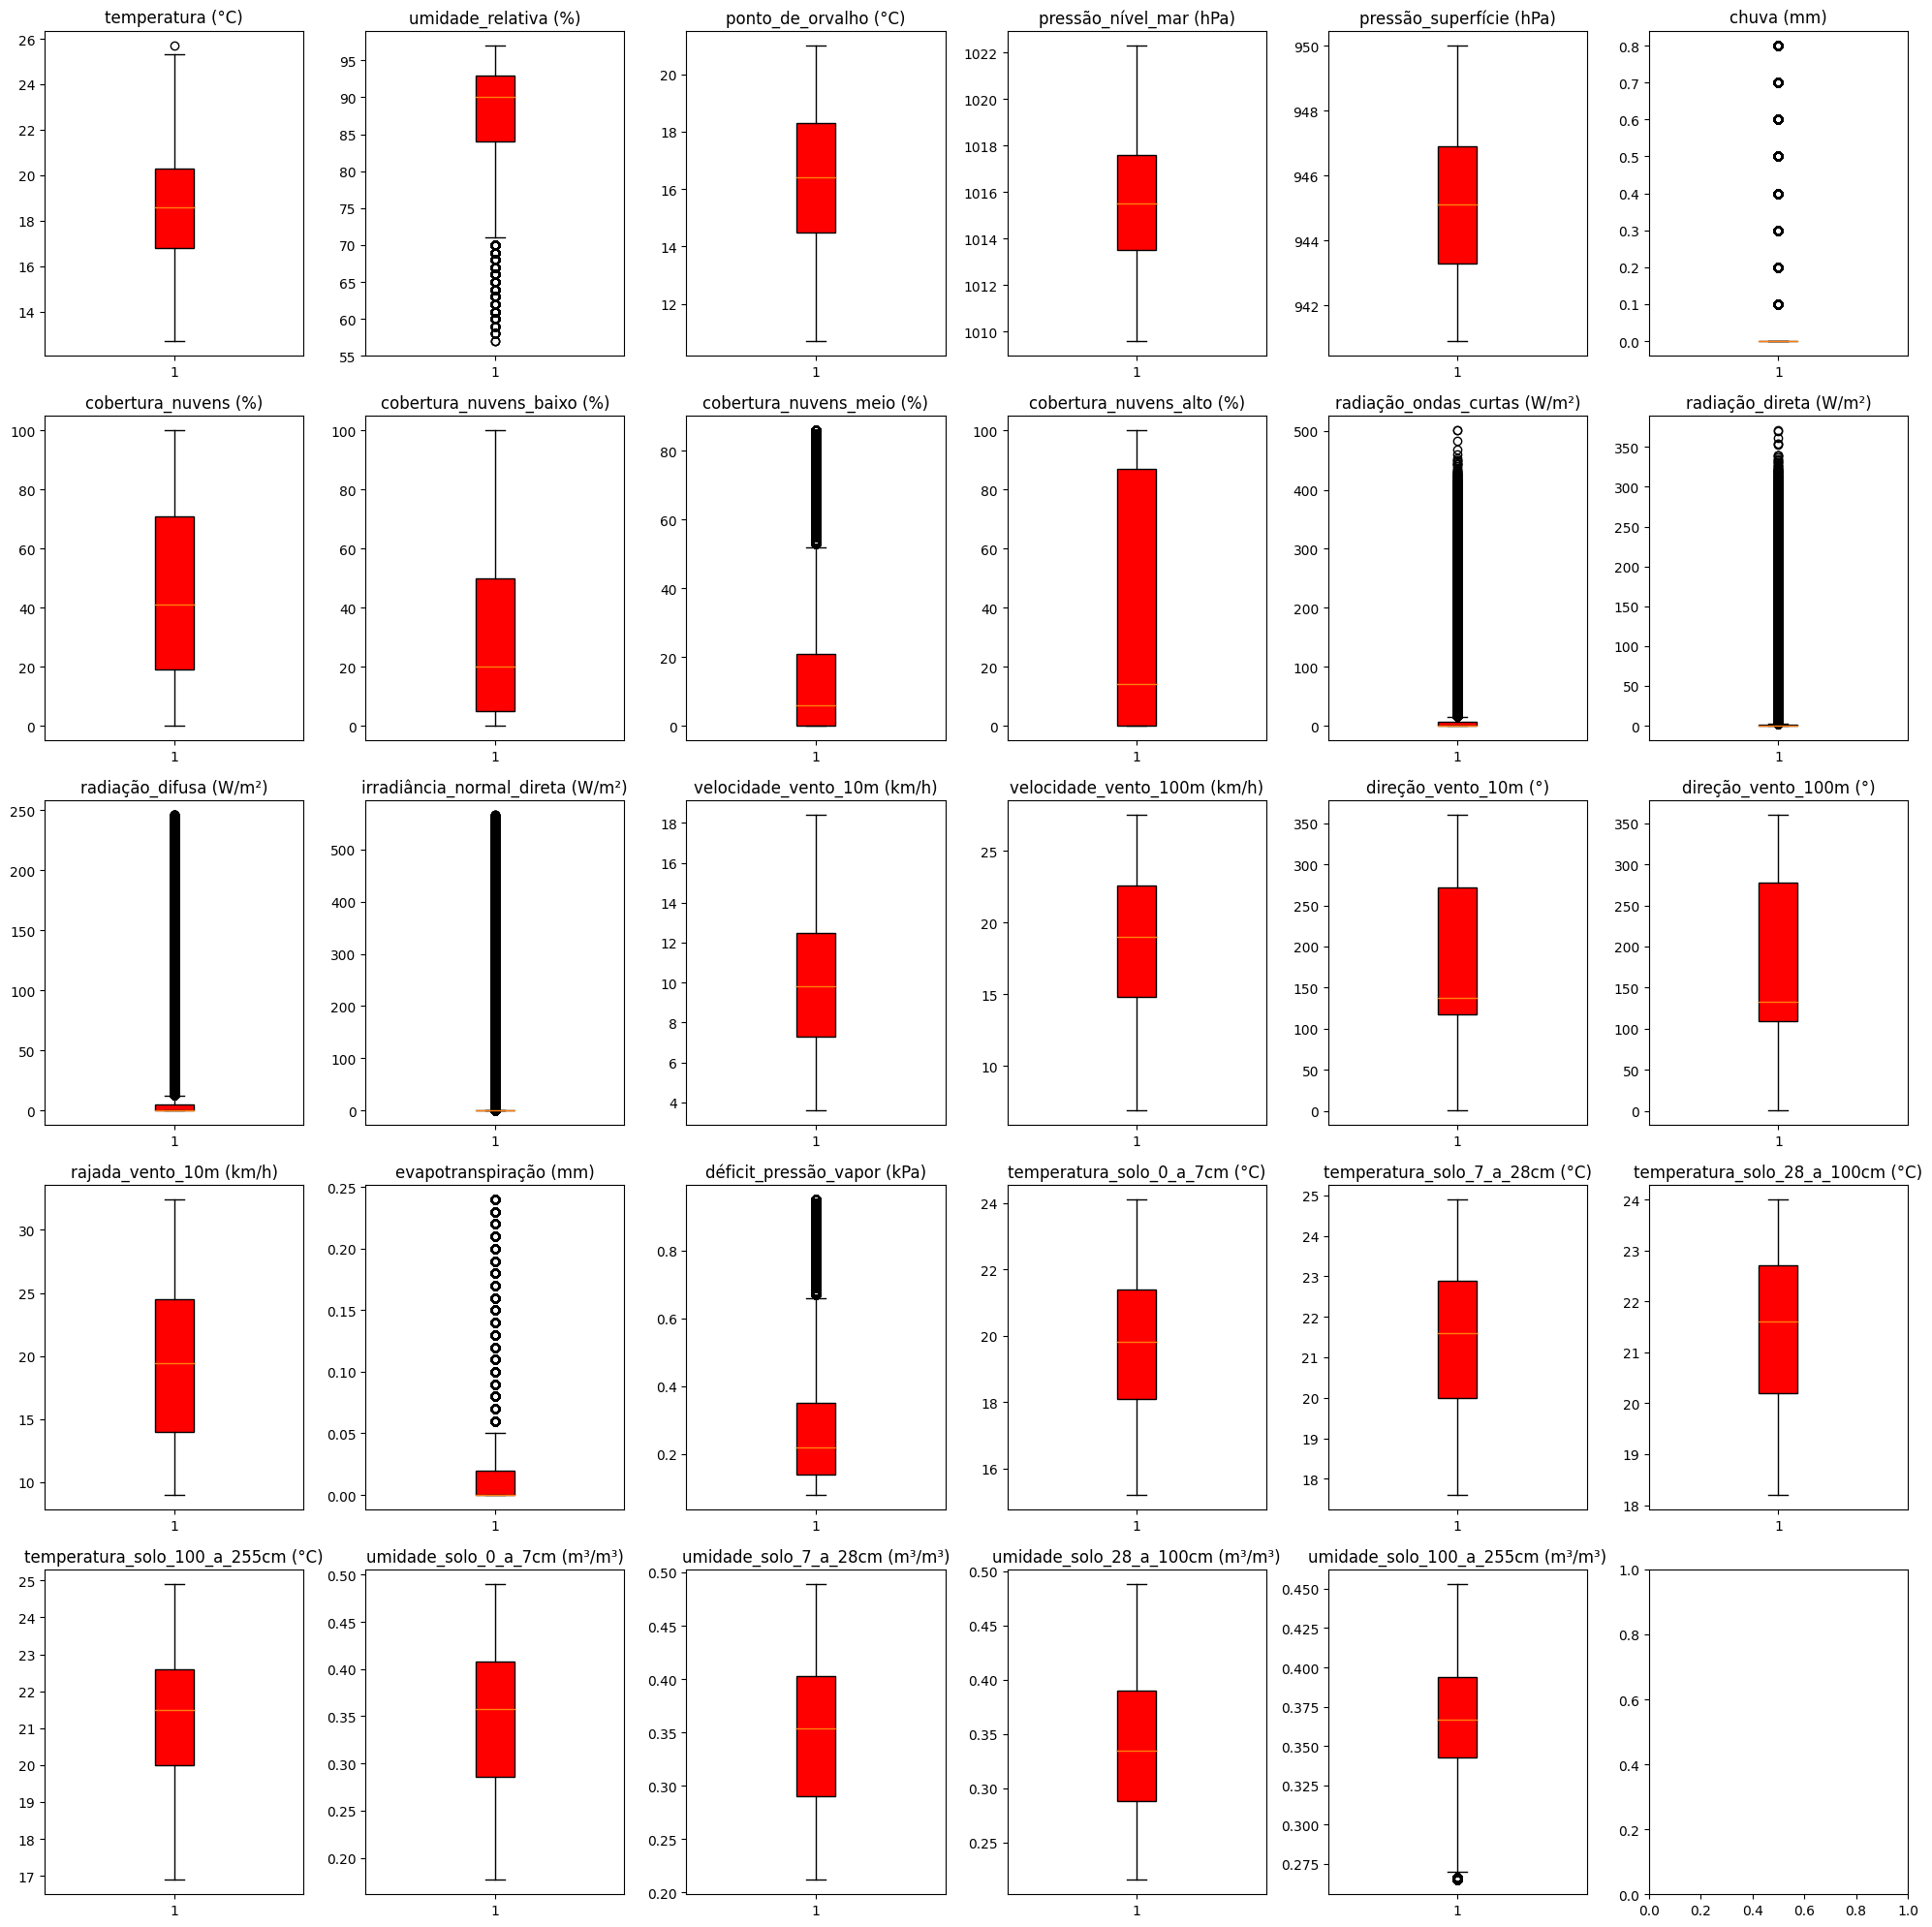

In [280]:
# Criando figura com 29 subplots
fig, axs = plt.subplots(5, 6, figsize=(20, 20))

# Plotando box plot de cada coluna em seu respectivo subplot
for i, col in enumerate(dataframe_no_outliers.columns):
    box = axs[i // 6, i % 6].boxplot(dataframe_no_outliers[col], patch_artist=True)
    for patch in box['boxes']:
        patch.set_facecolor('red')
    axs[i // 6, i % 6].set_title(col)

# Ajustando espaçamento entre os subplots
plt.tight_layout()

# Exibindo os gráficos
plt.show()

Separando as variáveis independentes (features) da variável target:

In [281]:
x=dataframe_no_outliers.iloc[:,1:]
y=dataframe_no_outliers.iloc[:,0]

Vendo a estrutura dos novos conjuntos, começando pelo de features:

In [282]:
x.head()

,umidade_relativa (%),ponto_de_orvalho (°C),pressão_nível_mar (hPa),pressão_superfície (hPa),chuva (mm),cobertura_nuvens (%),cobertura_nuvens_baixo (%),cobertura_nuvens_meio (%),cobertura_nuvens_alto (%),radiação_ondas_curtas (W/m²),...,evapotranspiração (mm),déficit_pressão_vapor (kPa),temperatura_solo_0_a_7cm (°C),temperatura_solo_7_a_28cm (°C),temperatura_solo_28_a_100cm (°C),temperatura_solo_100_a_255cm (°C),umidade_solo_0_a_7cm (m³/m³),umidade_solo_7_a_28cm (m³/m³),umidade_solo_28_a_100cm (m³/m³),umidade_solo_100_a_255cm (m³/m³)
Data/Hora,,,,,,,,,,,,,,,,,,,,,
1940-04-22T00:00,96,17.1,1016.1,945.4,0.0,15,3,21,0,0.0,...,0.00,0.09,20.4,21.6,21.2,21.4,0.342,0.338,0.363,0.453
1940-04-23T-13:00,91,18.5,1015.8,945.7,0.0,6,7,0,0,151.0,...,0.08,0.21,19.4,20.0,21.1,21.4,0.343,0.338,0.362,0.453
1940-04-23T-12:00,83,17.1,1016.0,945.9,0.0,1,1,0,0,368.0,...,0.21,0.41,19.0,20.0,21.1,21.4,0.342,0.338,0.362,0.453
1940-04-23T-1:00,94,17.5,1017.1,946.5,0.3,25,2,35,6,0.0,...,0.00,0.14,21.1,21.8,21.1,21.4,0.408,0.336,0.361,0.453
1940-04-23T00:00,94,17.7,1016.6,946.1,0.1,26,6,34,0,0.0,...,0.00,0.14,21.0,21.7,21.1,21.4,0.408,0.337,0.361,0.453


Conjunto correspondente à variável target:

In [283]:
y.head()

Data/Hora
1940-04-22T00:00     17.8
1940-04-23T-13:00    20.0
1940-04-23T-12:00    20.2
1940-04-23T-1:00     18.5
1940-04-23T00:00     18.8
Name: temperatura (°C), dtype: float64

Dividindo cada conjunto (features e target) em subconjuntos de teste e treino do modelo:

In [284]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=20)

Normalizando os dados de cada subconjunto:



In [285]:
scaler = MinMaxScaler()

# Aplicando a normalização nos dados de treino e teste das variáveis independentes
x_train_normalized = scaler.fit_transform(x_train)
x_test_normalized = scaler.fit_transform(x_test)

# Aplicando a normalização nos dados de treino e teste da variável dependente
y_train_normalized = scaler.fit_transform(y_train.to_numpy().reshape(-1, 1))
y_test_normalized = scaler.fit_transform(y_test.to_numpy().reshape(-1, 1))

# Transformando os arrays normalizados em dataframes com as mesmas colunas dos dataframes originais
x_train_normalized = pd.DataFrame(x_train_normalized, columns=x_train.columns, index=x_train.index)
x_test_normalized = pd.DataFrame(x_test_normalized, columns=x_test.columns, index=x_test.index)
y_train_normalized = pd.DataFrame(y_train_normalized, columns=['temperatura_media'], index=y_train.index)
y_test_normalized = pd.DataFrame(y_test_normalized, columns=['temperatura_media'], index=y_test.index)

Visualizando os subconjuntos com os dados normalizados, iniciando pelo subconjunto de features para treino:

In [286]:
x_train_normalized.head()

,umidade_relativa (%),ponto_de_orvalho (°C),pressão_nível_mar (hPa),pressão_superfície (hPa),chuva (mm),cobertura_nuvens (%),cobertura_nuvens_baixo (%),cobertura_nuvens_meio (%),cobertura_nuvens_alto (%),radiação_ondas_curtas (W/m²),...,evapotranspiração (mm),déficit_pressão_vapor (kPa),temperatura_solo_0_a_7cm (°C),temperatura_solo_7_a_28cm (°C),temperatura_solo_28_a_100cm (°C),temperatura_solo_100_a_255cm (°C),umidade_solo_0_a_7cm (m³/m³),umidade_solo_7_a_28cm (m³/m³),umidade_solo_28_a_100cm (m³/m³),umidade_solo_100_a_255cm (m³/m³)
Data/Hora,,,,,,,,,,,,,,,,,,,,,
2009-04-01T00:00,0.800,0.834951,0.141732,0.109890,0.0,0.10,0.04,0.127907,0.00,0.0,...,0.000000,0.241379,0.808989,0.849315,0.810345,0.7500,0.591054,0.588448,0.698529,0.728723
1966-01-01T-22:00,0.975,0.825243,0.291339,0.263736,0.0,1.00,1.00,0.104651,0.93,0.0,...,0.000000,0.011494,0.730337,0.780822,0.741379,0.6000,0.827476,0.895307,0.764706,0.500000
2000-11-06T08:00,0.950,0.708738,0.133858,0.032967,0.0,0.94,0.64,0.116279,1.00,0.0,...,0.000000,0.045977,0.595506,0.726027,0.827586,0.4500,0.543131,0.115523,0.158088,0.473404
1975-04-07T03:00,0.850,0.339806,0.637795,0.604396,0.0,0.03,0.03,0.000000,0.00,0.0,...,0.000000,0.080460,0.247191,0.369863,0.637931,0.7375,0.322684,0.292419,0.511029,0.569149
1957-12-24T-23:00,0.700,0.582524,0.322835,0.285714,0.0,0.03,0.01,0.000000,0.07,0.0,...,0.041667,0.287356,0.696629,0.808219,0.706897,0.4750,0.680511,0.725632,0.830882,0.882979


Subconjunto de features para teste:

In [287]:
x_test_normalized.head()

,umidade_relativa (%),ponto_de_orvalho (°C),pressão_nível_mar (hPa),pressão_superfície (hPa),chuva (mm),cobertura_nuvens (%),cobertura_nuvens_baixo (%),cobertura_nuvens_meio (%),cobertura_nuvens_alto (%),radiação_ondas_curtas (W/m²),...,evapotranspiração (mm),déficit_pressão_vapor (kPa),temperatura_solo_0_a_7cm (°C),temperatura_solo_7_a_28cm (°C),temperatura_solo_28_a_100cm (°C),temperatura_solo_100_a_255cm (°C),umidade_solo_0_a_7cm (m³/m³),umidade_solo_7_a_28cm (m³/m³),umidade_solo_28_a_100cm (m³/m³),umidade_solo_100_a_255cm (m³/m³)
Data/Hora,,,,,,,,,,,,,,,,,,,,,
1966-02-12T-14:00,0.794872,0.854369,0.203252,0.208791,0.0,0.71,0.34,0.197674,1.00,0.142857,...,0.166667,0.229885,0.730337,0.780822,0.948276,0.7125,0.853035,0.848375,0.764706,0.664894
1976-04-18T01:00,0.948718,0.776699,0.552846,0.604396,0.0,0.65,0.70,0.034884,0.00,0.000000,...,0.000000,0.045977,0.617978,0.630137,0.551724,0.6875,0.840256,0.801444,0.761029,0.654255
2004-10-16T05:00,0.948718,0.679612,0.512195,0.527473,0.0,0.88,0.12,0.953488,0.93,0.000000,...,0.000000,0.022989,0.494382,0.534247,0.603448,0.3875,0.667732,0.169675,0.132353,0.446809
2004-12-11T03:00,0.897436,0.543689,0.146341,0.043956,0.0,0.64,0.48,0.348837,0.08,0.000000,...,0.000000,0.080460,0.460674,0.534247,0.724138,0.5125,0.849840,0.823105,0.411765,0.414894
2013-01-21T09:00,0.820513,0.495146,0.569106,0.571429,0.0,0.69,0.55,0.023256,0.60,0.006397,...,0.125000,0.137931,0.483146,0.616438,0.827586,0.7625,0.763578,0.765343,0.654412,0.372340


Subconjunto da variável target para treino:

In [288]:
y_train_normalized.head()

,temperatura_media
Data/Hora,
2009-04-01T00:00,0.653846
1966-01-01T-22:00,0.553846
2000-11-06T08:00,0.476923
1975-04-07T03:00,0.223077
1957-12-24T-23:00,0.500000


Subconjunto da variável target para teste:

In [289]:
y_test_normalized.head()

,temperatura_media
Data/Hora,
1966-02-12T-14:00,0.690476
1976-04-18T01:00,0.547619
2004-10-16T05:00,0.452381
2004-12-11T03:00,0.380952
2013-01-21T09:00,0.380952


Verificando se as variáveis preditoras são independentes, removendo dos subconjuntos de teste e treino aquelas com correlação maior do que 0,7 em relação a outra variável:

In [290]:
# Obtendo a matriz de correlação
corr_matrix = x_train_normalized.corr().abs()

# Definindo a matriz diagonal como zeros para evitar a remoção da mesma variável
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Encontrando pares de variáveis com alta correlação (maior que 0.7)
high_corr = corr_matrix.mask(mask).stack().reset_index()
high_corr.columns = ['var1', 'var2', 'corr']
high_corr = high_corr[high_corr['corr'] > 0.7]

# Criando uma lista com as variáveis a serem removidas
to_drop = []
for index, row in high_corr.iterrows():
    if row['var1'] not in to_drop:
        to_drop.append(row['var1'])

# Removendo as variáveis dos dataframes
x_train_normalized = x_train_normalized.drop(to_drop, axis=1)
x_test_normalized = x_test_normalized.drop(to_drop, axis=1)



Visualizando o subconjunto de treino de features com as variáveis restantes:

In [291]:
x_train_normalized.head()

,umidade_relativa (%),ponto_de_orvalho (°C),pressão_nível_mar (hPa),chuva (mm),cobertura_nuvens (%),cobertura_nuvens_meio (%),cobertura_nuvens_alto (%),radiação_ondas_curtas (W/m²),velocidade_vento_10m (km/h),direção_vento_10m (°),temperatura_solo_100_a_255cm (°C),umidade_solo_0_a_7cm (m³/m³),umidade_solo_100_a_255cm (m³/m³)
Data/Hora,,,,,,,,,,,,,
2009-04-01T00:00,0.800,0.834951,0.141732,0.0,0.10,0.127907,0.00,0.0,0.486486,0.395543,0.7500,0.591054,0.728723
1966-01-01T-22:00,0.975,0.825243,0.291339,0.0,1.00,0.104651,0.93,0.0,0.216216,0.178273,0.6000,0.827476,0.500000
2000-11-06T08:00,0.950,0.708738,0.133858,0.0,0.94,0.116279,1.00,0.0,0.479730,0.373259,0.4500,0.543131,0.473404
1975-04-07T03:00,0.850,0.339806,0.637795,0.0,0.03,0.000000,0.00,0.0,0.695946,0.913649,0.7375,0.322684,0.569149
1957-12-24T-23:00,0.700,0.582524,0.322835,0.0,0.03,0.000000,0.07,0.0,0.547297,0.373259,0.4750,0.680511,0.882979


Visualizando o subconjunto de teste de features com as variáveis restantes:

In [292]:
x_test_normalized.head()

,umidade_relativa (%),ponto_de_orvalho (°C),pressão_nível_mar (hPa),chuva (mm),cobertura_nuvens (%),cobertura_nuvens_meio (%),cobertura_nuvens_alto (%),radiação_ondas_curtas (W/m²),velocidade_vento_10m (km/h),direção_vento_10m (°),temperatura_solo_100_a_255cm (°C),umidade_solo_0_a_7cm (m³/m³),umidade_solo_100_a_255cm (m³/m³)
Data/Hora,,,,,,,,,,,,,
1966-02-12T-14:00,0.794872,0.854369,0.203252,0.0,0.71,0.197674,1.00,0.142857,0.418919,0.225627,0.7125,0.853035,0.664894
1976-04-18T01:00,0.948718,0.776699,0.552846,0.0,0.65,0.034884,0.00,0.000000,0.648649,0.846797,0.6875,0.840256,0.654255
2004-10-16T05:00,0.948718,0.679612,0.512195,0.0,0.88,0.953488,0.93,0.000000,0.229730,0.345404,0.3875,0.667732,0.446809
2004-12-11T03:00,0.897436,0.543689,0.146341,0.0,0.64,0.348837,0.08,0.000000,0.412162,0.412256,0.5125,0.849840,0.414894
2013-01-21T09:00,0.820513,0.495146,0.569106,0.0,0.69,0.023256,0.60,0.006397,0.729730,0.395543,0.7625,0.763578,0.372340


Identificando 10 variáveis mais significativas para a variável target (temperatura), utilizando o teste F de Fisher:

In [305]:
# Definindo o número de features a serem selecionadas
k = 10

# Criando o seletor de features
selector = SelectKBest(f_regression, k=k)

# Aplicando o seletor aos dados de treino
selector.fit_transform(x_train_normalized, y_train_normalized)

# Obtendo as features selecionadas
selected_features = x_train_normalized.columns[selector.get_support()]

print("Features selecionadas:", selected_features)

Features selecionadas: Index(['umidade_relativa (%)', 'ponto_de_orvalho (°C)',
       'pressão_nível_mar (hPa)', 'chuva (mm)', 'cobertura_nuvens_meio (%)',
       'cobertura_nuvens_alto (%)', 'radiação_ondas_curtas (W/m²)',
       'velocidade_vento_10m (km/h)', 'temperatura_solo_100_a_255cm (°C)',
       'umidade_solo_0_a_7cm (m³/m³)'],
      dtype='object')


In [306]:
new_x_train = x_train_normalized[selected_features]
new_x_test = x_test_normalized[selected_features]

Visualizando o subconjunto de treino com as variáveis selecionadas:

In [307]:
new_x_train.head()

,umidade_relativa (%),ponto_de_orvalho (°C),pressão_nível_mar (hPa),chuva (mm),cobertura_nuvens_meio (%),cobertura_nuvens_alto (%),radiação_ondas_curtas (W/m²),velocidade_vento_10m (km/h),temperatura_solo_100_a_255cm (°C),umidade_solo_0_a_7cm (m³/m³)
Data/Hora,,,,,,,,,,
2009-04-01T00:00,0.800,0.834951,0.141732,0.0,0.127907,0.00,0.0,0.486486,0.7500,0.591054
1966-01-01T-22:00,0.975,0.825243,0.291339,0.0,0.104651,0.93,0.0,0.216216,0.6000,0.827476
2000-11-06T08:00,0.950,0.708738,0.133858,0.0,0.116279,1.00,0.0,0.479730,0.4500,0.543131
1975-04-07T03:00,0.850,0.339806,0.637795,0.0,0.000000,0.00,0.0,0.695946,0.7375,0.322684
1957-12-24T-23:00,0.700,0.582524,0.322835,0.0,0.000000,0.07,0.0,0.547297,0.4750,0.680511


Visualizando o subconjunto de teste com as variáveis selecionadas:

In [308]:
new_x_test.head()

,umidade_relativa (%),ponto_de_orvalho (°C),pressão_nível_mar (hPa),chuva (mm),cobertura_nuvens_meio (%),cobertura_nuvens_alto (%),radiação_ondas_curtas (W/m²),velocidade_vento_10m (km/h),temperatura_solo_100_a_255cm (°C),umidade_solo_0_a_7cm (m³/m³)
Data/Hora,,,,,,,,,,
1966-02-12T-14:00,0.794872,0.854369,0.203252,0.0,0.197674,1.00,0.142857,0.418919,0.7125,0.853035
1976-04-18T01:00,0.948718,0.776699,0.552846,0.0,0.034884,0.00,0.000000,0.648649,0.6875,0.840256
2004-10-16T05:00,0.948718,0.679612,0.512195,0.0,0.953488,0.93,0.000000,0.229730,0.3875,0.667732
2004-12-11T03:00,0.897436,0.543689,0.146341,0.0,0.348837,0.08,0.000000,0.412162,0.5125,0.849840
2013-01-21T09:00,0.820513,0.495146,0.569106,0.0,0.023256,0.60,0.006397,0.729730,0.7625,0.763578


# **Ajustando e avaliando o modelo de regressão linear**

In [309]:
regressor = LinearRegression()
model = regressor.fit(new_x_train,y_train_normalized)

Fazendo as predições com o subconjunto de teste de features:

In [310]:
y_pred = regressor.predict(new_x_test)

Avaliação do modelo de regressão linear, calculando os valores para o Coeficiente de Determinação R², Erro Quadrático Médio (MSE), Raiz do Erro Quadrático Médio (RMSE) e Erro Absoluto Médio (MAE):

In [311]:
accuracy = metrics.r2_score(y_test_normalized, y_pred)
print("R-squared:", accuracy)

R-squared: 0.9937605725820091


In [312]:
rmse = sqrt(mean_squared_error(y_test_normalized, y_pred))
print("RMSE:", rmse)

RMSE: 0.014702527347415149


In [313]:
mse = mean_squared_error(y_test_normalized, y_pred)
print("MSE:", mse)

MSE: 0.00021616431040149034


In [314]:
mae = metrics.mean_absolute_error(y_test_normalized, y_pred)
print("MAE:", mae)

MAE: 0.012236000538116529


Comparando temperaturas reais com as temperaturas previstas pelo modelo em um intervalo equivalente a uma semana (168 horas):

In [315]:
# Aplicando fórmula para converter os valores previstos de temperatura em °C
y_pred_original = y_pred * (scaler.data_max_ - scaler.data_min_) + scaler.data_min_

# Criando dataframe com os valores reais e previstos
dataframe_predict_actual = pd.DataFrame({'Reais': y_test.to_numpy().flatten(), 'Previstos': y_pred_original.flatten()})


# Calculando a diferença entre os valores previstos e reais
dataframe_predict_actual['Diferença'] = dataframe_predict_actual['Previstos'] - dataframe_predict_actual['Reais']

# Exibindo as primeiras 168 linhas do dataframe
print(dataframe_predict_actual.head(168))

     Reais  Previstos  Diferença
0     21.4  21.202620  -0.197380
1     19.6  19.245037  -0.354963
2     18.4  18.282551  -0.117449
3     17.5  17.283524  -0.216476
4     17.5  17.349051  -0.150949
..     ...        ...        ...
163   20.7  20.446578  -0.253422
164   17.0  16.971830  -0.028170
165   18.3  18.270601  -0.029399
166   18.6  18.271717  -0.328283
167   21.3  21.007386  -0.292614

[168 rows x 3 columns]


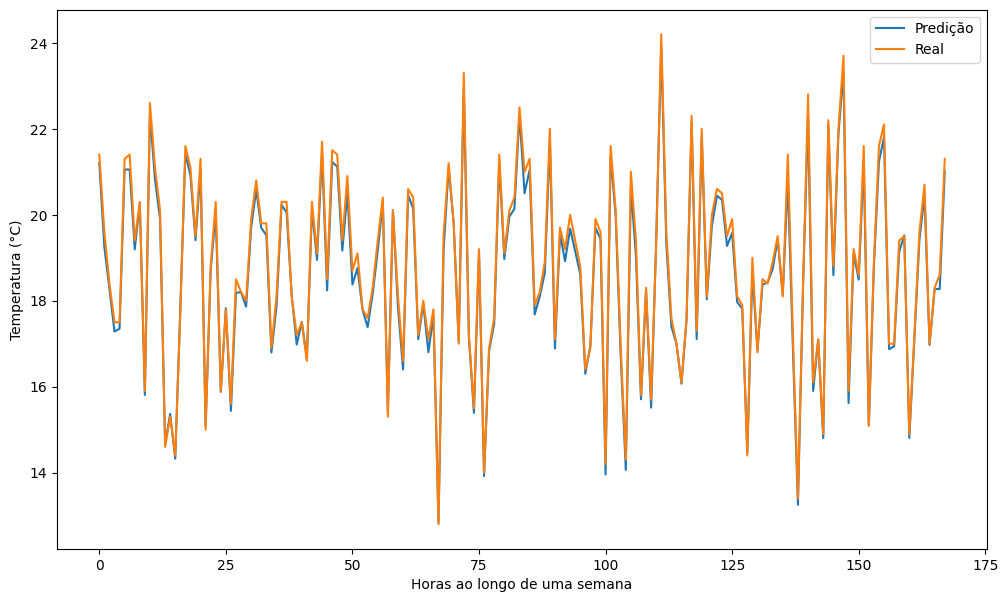

In [316]:
finaldataframe = dataframe_predict_actual.reset_index(drop=True)

plt.figure(figsize=(12, 7))
plt.plot(finaldataframe['Previstos'][:168], label="Predição")
plt.plot(finaldataframe['Reais'][:168], label="Real")
plt.xlabel('Horas ao longo de uma semana')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()

## **Utilizando regressão interquartílica**

Devido a presença de muitos outliers nos dados, mesmo após o uso de técnicas para sua redução, e não ser possível determinar se esses outliers são devidos a erros de coleta, decidi testar também o uso da regressão interquartílica, uma técnica de regressão linear que é menos sensível a outliers. Isso ocorre porque a regressão interquartílica é baseada na estimativa da mediana condicional, ao invés da média condicional utilizada na regressão linear tradicional.

Ao utilizar a regressão interquartílica, podemos reduzir a influência desses outliers nos resultados da análise, o que pode ser especialmente útil em situações em que a presença desses outliers pode levar a conclusões equivocadas.Portanto, a regressão interquartílica pode ser uma técnica valiosa para lidar com outliers em conjuntos de dados complexos. 

A seguir, foram separadas as variáveis independentes da variável target a partir do dataframe sem os valores nulos:

In [317]:
x_2scenario = dataframe_no_null.iloc[:,1:]
y_2scenario = dataframe_no_null.iloc[:,0]

Vendo a estrutura dos novos conjuntos, começando pelo de features:

In [318]:
x_2scenario.head()

,umidade_relativa (%),ponto_de_orvalho (°C),pressão_nível_mar (hPa),pressão_superfície (hPa),chuva (mm),cobertura_nuvens (%),cobertura_nuvens_baixo (%),cobertura_nuvens_meio (%),cobertura_nuvens_alto (%),radiação_ondas_curtas (W/m²),...,evapotranspiração (mm),déficit_pressão_vapor (kPa),temperatura_solo_0_a_7cm (°C),temperatura_solo_7_a_28cm (°C),temperatura_solo_28_a_100cm (°C),temperatura_solo_100_a_255cm (°C),umidade_solo_0_a_7cm (m³/m³),umidade_solo_7_a_28cm (m³/m³),umidade_solo_28_a_100cm (m³/m³),umidade_solo_100_a_255cm (m³/m³)
Data/Hora,,,,,,,,,,,,,,,,,,,,,
1940-01-01T-16:00,93,16.1,1013.2,942.6,0.0,100,61,68,63,0.0,...,0.00,0.15,17.7,18.9,20.6,20.0,0.466,0.473,0.488,0.464
1940-01-01T-15:00,93,16.2,1014.1,943.5,0.0,83,47,46,44,7.0,...,0.02,0.15,17.6,18.9,20.6,20.0,0.465,0.472,0.487,0.464
1940-01-01T-14:00,89,20.6,1017.8,948.1,0.0,100,67,42,82,134.0,...,0.08,0.31,21.3,18.8,20.6,20.0,0.464,0.471,0.487,0.465
1940-01-01T-13:00,86,20.2,1017.5,947.9,0.4,100,56,44,100,204.0,...,0.14,0.38,21.2,18.9,20.6,20.0,0.465,0.469,0.487,0.465
1940-01-01T-12:00,85,19.9,1017.4,947.8,0.8,100,88,60,100,276.0,...,0.19,0.42,21.1,18.9,20.6,20.0,0.473,0.469,0.487,0.465


Estrutura do conjunto de temperaturas:

In [319]:
y_2scenario.head()

Data/Hora
1940-01-01T-16:00    17.3
1940-01-01T-15:00    17.4
1940-01-01T-14:00    22.6
1940-01-01T-13:00    22.7
1940-01-01T-12:00    22.6
Name: temperatura (°C), dtype: float64

Dividindo cada conjunto (features e target) em subconjuntos de teste e treino do modelo:

In [320]:
x_2_train, x_2_test, y_2_train, y_2_test = train_test_split(x_2scenario, y_2scenario, test_size = 0.2, random_state=20)

Apesar de a regressão interquartílica não exigir que os dados estejam normalizados, optei pela normalização visto que as escalas das variáveis são muito diferentes entre si:


In [321]:
scaler = MinMaxScaler()

# Aplicando a normalização nos dados de treino e teste das variáveis independentes
x_2_train_normalized = scaler.fit_transform(x_2_train)
x_2_test_normalized = scaler.fit_transform(x_2_test)

# Aplicando a normalização nos dados de treino e teste da variável dependente
y_2_train_normalized = scaler.fit_transform(y_2_train.to_numpy().reshape(-1, 1))
y_2_test_normalized = scaler.fit_transform(y_2_test.to_numpy().reshape(-1, 1))

# Transformando os arrays normalizados em dataframes com as mesmas colunas dos dataframes originais
x_2_train_normalized = pd.DataFrame(x_2_train_normalized, columns=x_2_train.columns, index=x_2_train.index)
x_2_test_normalized = pd.DataFrame(x_2_test_normalized, columns=x_2_test.columns, index=x_2_test.index)
y_2_train_normalized = pd.DataFrame(y_2_train_normalized, columns=['temperatura_media'], index=y_2_train.index)
y_2_test_normalized = pd.DataFrame(y_2_test_normalized, columns=['temperatura_media'], index=y_2_test.index)

Visualizando os subconjuntos com os dados normalizados, iniciando pelo subconjunto de features para treino:

In [322]:
x_2_train_normalized.head()

,umidade_relativa (%),ponto_de_orvalho (°C),pressão_nível_mar (hPa),pressão_superfície (hPa),chuva (mm),cobertura_nuvens (%),cobertura_nuvens_baixo (%),cobertura_nuvens_meio (%),cobertura_nuvens_alto (%),radiação_ondas_curtas (W/m²),...,evapotranspiração (mm),déficit_pressão_vapor (kPa),temperatura_solo_0_a_7cm (°C),temperatura_solo_7_a_28cm (°C),temperatura_solo_28_a_100cm (°C),temperatura_solo_100_a_255cm (°C),umidade_solo_0_a_7cm (m³/m³),umidade_solo_7_a_28cm (m³/m³),umidade_solo_28_a_100cm (m³/m³),umidade_solo_100_a_255cm (m³/m³)
Data/Hora,,,,,,,,,,,,,,,,,,,,,
1984-09-26T15:00,0.750000,0.806250,0.430052,0.461095,0.024291,0.89,0.16,0.74,1.00,0.341463,...,0.291667,0.107087,0.469849,0.436975,0.324138,0.289157,0.725552,0.607774,0.371841,0.543307
1979-04-23T13:00,0.652174,0.590625,0.554404,0.556196,0.000000,0.48,0.49,0.07,0.00,0.400697,...,0.281250,0.108661,0.376884,0.373950,0.462069,0.626506,0.451104,0.431095,0.545126,0.460630
1955-01-31T-20:00,0.880435,0.781250,0.507772,0.518732,0.000000,0.51,0.12,0.19,0.97,0.000000,...,0.000000,0.040945,0.414573,0.563025,0.551724,0.650602,0.539432,0.522968,0.722022,0.547244
1955-10-14T-21:00,0.891304,0.759375,0.510363,0.515850,0.000000,0.51,0.20,0.05,0.99,0.000000,...,0.000000,0.037795,0.447236,0.600840,0.537931,0.409639,0.476341,0.077739,0.079422,0.429134
2018-01-25T12:00,0.739130,0.843750,0.487047,0.527378,0.000000,0.48,0.07,0.23,0.92,0.401568,...,0.322917,0.119685,0.527638,0.617647,0.682759,0.771084,0.558360,0.558304,0.498195,0.303150


Subconjunto de features para teste:

In [323]:
x_2_test_normalized.head()

,umidade_relativa (%),ponto_de_orvalho (°C),pressão_nível_mar (hPa),pressão_superfície (hPa),chuva (mm),cobertura_nuvens (%),cobertura_nuvens_baixo (%),cobertura_nuvens_meio (%),cobertura_nuvens_alto (%),radiação_ondas_curtas (W/m²),...,evapotranspiração (mm),déficit_pressão_vapor (kPa),temperatura_solo_0_a_7cm (°C),temperatura_solo_7_a_28cm (°C),temperatura_solo_28_a_100cm (°C),temperatura_solo_100_a_255cm (°C),umidade_solo_0_a_7cm (m³/m³),umidade_solo_7_a_28cm (m³/m³),umidade_solo_28_a_100cm (m³/m³),umidade_solo_100_a_255cm (m³/m³)
Data/Hora,,,,,,,,,,,,,,,,,,,,,
1945-09-28T-23:00,0.652174,0.670846,0.412698,0.436202,0.0,0.01,0.00,0.00,0.03,0.000000,...,0.032258,0.127559,0.408740,0.489451,0.368056,0.277108,0.531447,0.556738,0.501805,0.723320
1986-01-31T07:00,0.934783,0.824451,0.423280,0.445104,0.0,0.50,0.03,0.28,1.00,0.000000,...,0.000000,0.023622,0.462725,0.649789,0.715278,0.759036,0.512579,0.485816,0.238267,0.371542
2020-09-09T05:00,0.902174,0.699060,0.584656,0.590504,0.0,0.57,0.54,0.11,0.07,0.000000,...,0.000000,0.028346,0.401028,0.590717,0.479167,0.469880,0.056604,0.127660,0.057762,0.079051
1956-02-27T-17:00,0.967391,0.764890,0.367725,0.370920,0.0,0.18,0.01,0.07,0.42,0.000000,...,0.000000,0.011024,0.403599,0.556962,0.652778,0.843373,0.698113,0.524823,0.184116,0.355731
2003-03-23T21:00,0.760870,0.717868,0.579365,0.605341,0.0,0.38,0.39,0.04,0.00,0.084731,...,0.096774,0.083465,0.437018,0.506329,0.625000,0.891566,0.698113,0.730496,0.595668,0.513834


Subconjunto da variável target para treino:

In [324]:
y_2_train_normalized.head()

,temperatura_media
Data/Hora,
1984-09-26T15:00,0.609375
1979-04-23T13:00,0.473958
1955-01-31T-20:00,0.523438
1955-10-14T-21:00,0.502604
2018-01-25T12:00,0.643229


Subconjunto da variável target para teste:

In [325]:
y_2_test_normalized.head()

,temperatura_media
Data/Hora,
1945-09-28T-23:00,0.527174
1986-01-31T07:00,0.519022
2020-09-09T05:00,0.423913
1956-02-27T-17:00,0.456522
2003-03-23T21:00,0.505435


Verificando se as variáveis preditoras são independentes, removendo dos subconjuntos de teste e treino aquelas com correlação maior do que 0,7 em relação a outra variável:

In [326]:
# Obtendo a matriz de correlação
corr_matrix = x_2_train_normalized.corr().abs()

# Definindo a matriz diagonal como zeros para evitar a remoção da mesma variável
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Encontrando pares de variáveis com alta correlação (maior que 0.7)
high_corr = corr_matrix.mask(mask).stack().reset_index()
high_corr.columns = ['var1', 'var2', 'corr']
high_corr = high_corr[high_corr['corr'] > 0.7]

# Criando uma lista com as variáveis a serem removidas
to_drop = []
for index, row in high_corr.iterrows():
    if row['var1'] not in to_drop:
        to_drop.append(row['var1'])

# Removendo as variáveis dos dataframes
x_2_train_normalized = x_2_train_normalized.drop(to_drop, axis=1)
x_2_test_normalized = x_2_test_normalized.drop(to_drop, axis=1)



Visualizando o subconjunto de treino de features com as variáveis restantes:

In [327]:
x_2_train_normalized.head()

,umidade_relativa (%),ponto_de_orvalho (°C),pressão_nível_mar (hPa),chuva (mm),cobertura_nuvens (%),cobertura_nuvens_meio (%),cobertura_nuvens_alto (%),radiação_ondas_curtas (W/m²),velocidade_vento_10m (km/h),direção_vento_10m (°),temperatura_solo_0_a_7cm (°C),umidade_solo_0_a_7cm (m³/m³),umidade_solo_100_a_255cm (m³/m³)
Data/Hora,,,,,,,,,,,,,
1984-09-26T15:00,0.750000,0.806250,0.430052,0.024291,0.89,0.74,1.00,0.341463,0.182058,0.857939,0.469849,0.725552,0.543307
1979-04-23T13:00,0.652174,0.590625,0.554404,0.000000,0.48,0.07,0.00,0.400697,0.598945,0.467967,0.376884,0.451104,0.460630
1955-01-31T-20:00,0.880435,0.781250,0.507772,0.000000,0.51,0.19,0.97,0.000000,0.160950,0.075209,0.414573,0.539432,0.547244
1955-10-14T-21:00,0.891304,0.759375,0.510363,0.000000,0.51,0.05,0.99,0.000000,0.321900,0.342618,0.447236,0.476341,0.429134
2018-01-25T12:00,0.739130,0.843750,0.487047,0.000000,0.48,0.23,0.92,0.401568,0.208443,0.415042,0.527638,0.558360,0.303150


Visualizando o subconjunto de teste de features com as variáveis restantes:

In [328]:
x_2_test_normalized.head()

,umidade_relativa (%),ponto_de_orvalho (°C),pressão_nível_mar (hPa),chuva (mm),cobertura_nuvens (%),cobertura_nuvens_meio (%),cobertura_nuvens_alto (%),radiação_ondas_curtas (W/m²),velocidade_vento_10m (km/h),direção_vento_10m (°),temperatura_solo_0_a_7cm (°C),umidade_solo_0_a_7cm (m³/m³),umidade_solo_100_a_255cm (m³/m³)
Data/Hora,,,,,,,,,,,,,
1945-09-28T-23:00,0.652174,0.670846,0.412698,0.0,0.01,0.00,0.03,0.000000,0.260479,0.130919,0.408740,0.531447,0.723320
1986-01-31T07:00,0.934783,0.824451,0.423280,0.0,0.50,0.28,1.00,0.000000,0.218563,0.052925,0.462725,0.512579,0.371542
2020-09-09T05:00,0.902174,0.699060,0.584656,0.0,0.57,0.11,0.07,0.000000,0.395210,0.373259,0.401028,0.056604,0.079051
1956-02-27T-17:00,0.967391,0.764890,0.367725,0.0,0.18,0.07,0.42,0.000000,0.188623,0.161560,0.403599,0.698113,0.355731
2003-03-23T21:00,0.760870,0.717868,0.579365,0.0,0.38,0.04,0.00,0.084731,0.535928,0.420613,0.437018,0.698113,0.513834


Identificando 10 variáveis mais significativas para a variável target (temperatura), utilizando o teste F de Fisher:

In [329]:
# Definindo o número de features a serem selecionadas
k = 10

# Criando o seletor de features
selector = SelectKBest(f_regression, k=k)

# Aplicando o seletor aos dados de treino
selector.fit_transform(x_2_train_normalized, y_2_train_normalized)

# Obtendo as features selecionadas
selected_features = x_2_train_normalized.columns[selector.get_support()]

print("Features selecionadas:", selected_features)

Features selecionadas: Index(['umidade_relativa (%)', 'ponto_de_orvalho (°C)',
       'pressão_nível_mar (hPa)', 'chuva (mm)', 'cobertura_nuvens_meio (%)',
       'cobertura_nuvens_alto (%)', 'radiação_ondas_curtas (W/m²)',
       'velocidade_vento_10m (km/h)', 'direção_vento_10m (°)',
       'temperatura_solo_0_a_7cm (°C)'],
      dtype='object')


In [330]:
new_2_x_train = x_2_train_normalized[selected_features]
new_2_x_test = x_2_test_normalized[selected_features]

Visualizando o subconjunto de treino com as variáveis selecionadas:

In [331]:
new_2_x_train.head()

,umidade_relativa (%),ponto_de_orvalho (°C),pressão_nível_mar (hPa),chuva (mm),cobertura_nuvens_meio (%),cobertura_nuvens_alto (%),radiação_ondas_curtas (W/m²),velocidade_vento_10m (km/h),direção_vento_10m (°),temperatura_solo_0_a_7cm (°C)
Data/Hora,,,,,,,,,,
1984-09-26T15:00,0.750000,0.806250,0.430052,0.024291,0.74,1.00,0.341463,0.182058,0.857939,0.469849
1979-04-23T13:00,0.652174,0.590625,0.554404,0.000000,0.07,0.00,0.400697,0.598945,0.467967,0.376884
1955-01-31T-20:00,0.880435,0.781250,0.507772,0.000000,0.19,0.97,0.000000,0.160950,0.075209,0.414573
1955-10-14T-21:00,0.891304,0.759375,0.510363,0.000000,0.05,0.99,0.000000,0.321900,0.342618,0.447236
2018-01-25T12:00,0.739130,0.843750,0.487047,0.000000,0.23,0.92,0.401568,0.208443,0.415042,0.527638


Visualizando o subconjunto de teste com as variáveis selecionadas:

In [232]:
new_2_x_test.head()

,umidade_relativa (%),ponto_de_orvalho (°C),pressão_nível_mar (hPa),chuva (mm),cobertura_nuvens_meio (%),cobertura_nuvens_alto (%),radiação_ondas_curtas (W/m²),velocidade_vento_10m (km/h),direção_vento_10m (°),temperatura_solo_0_a_7cm (°C)
Data/Hora,,,,,,,,,,
1945-09-28T-23:00,0.652174,0.670846,0.412698,0.0,0.00,0.03,0.000000,0.260479,0.130919,0.408740
1986-01-31T07:00,0.934783,0.824451,0.423280,0.0,0.28,1.00,0.000000,0.218563,0.052925,0.462725
2020-09-09T05:00,0.902174,0.699060,0.584656,0.0,0.11,0.07,0.000000,0.395210,0.373259,0.401028
1956-02-27T-17:00,0.967391,0.764890,0.367725,0.0,0.07,0.42,0.000000,0.188623,0.161560,0.403599
2003-03-23T21:00,0.760870,0.717868,0.579365,0.0,0.04,0.00,0.084731,0.535928,0.420613,0.437018


# **Ajustando e avaliando o modelo de regressão interquartílica**

In [ ]:
model = RANSACRegressor()
model.fit(new_2_x_train, y_2_train_normalized)

Fazendo as predições com o subconjunto de teste de features:

In [333]:
y_pred_2 = model.predict(new_2_x_test)

Avaliação do modelo de regressão interquartílica, calculando os valores para o Coeficiente de Determinação R², Erro Quadrático Médio (MSE), Raiz do Erro Quadrático Médio (RMSE) e Erro Absoluto Médio (MAE):

In [334]:
r2 = r2_score(y_2_test_normalized, y_pred_2)
print("R-squared:", r2)

R-squared: 0.9607316017298848


In [335]:
rmse = mean_squared_error(y_2_test, y_pred_2, squared=False)
print("RMSE:", rmse)

RMSE: 20.175977159794453


In [336]:
mse = mean_squared_error(y_2_test_normalized, y_pred_2)
print("MSE:", mse)

MSE: 0.0006158824070132513


In [337]:
mae = mean_absolute_error(y_2_test_normalized, y_pred_2)
print("MAE:", mae)

MAE: 0.020995122482189127


Comparando temperaturas reais com as temperaturas previstas pelo modelo em um intervalo equivalente a uma semana (168 horas):

In [338]:
# Aplicando fórmula para converter os valores previstos de temperatura em °C
y_pred_original_2 = y_pred_2 * (scaler.data_max_ - scaler.data_min_) + scaler.data_min_

# Criando dataframe com os valores reais e previstos
dataframe_predict_actual_2 = pd.DataFrame({'Reais': y_2_test.to_numpy().flatten(), 'Previstos': y_pred_original_2.flatten()})

# Calculando a diferença entre os valores previstos e reais
dataframe_predict_actual_2['Diferença'] = dataframe_predict_actual_2['Previstos'] - dataframe_predict_actual_2['Reais']

# Exibindo as primeiras 168 linhas do dataframe
print(dataframe_predict_actual_2.head(168))

     Reais  Previstos  Diferença
0     21.4  22.151644   0.751644
1     21.1  21.746641   0.646641
2     17.6  18.490838   0.890838
3     18.8  19.296094   0.496094
4     20.6  21.375508   0.775508
..     ...        ...        ...
163   19.8  20.565529   0.765529
164   22.0  22.517129   0.517129
165   22.8  23.515826   0.715826
166   16.6  16.952157   0.352157
167   16.5  17.522471   1.022471

[168 rows x 3 columns]


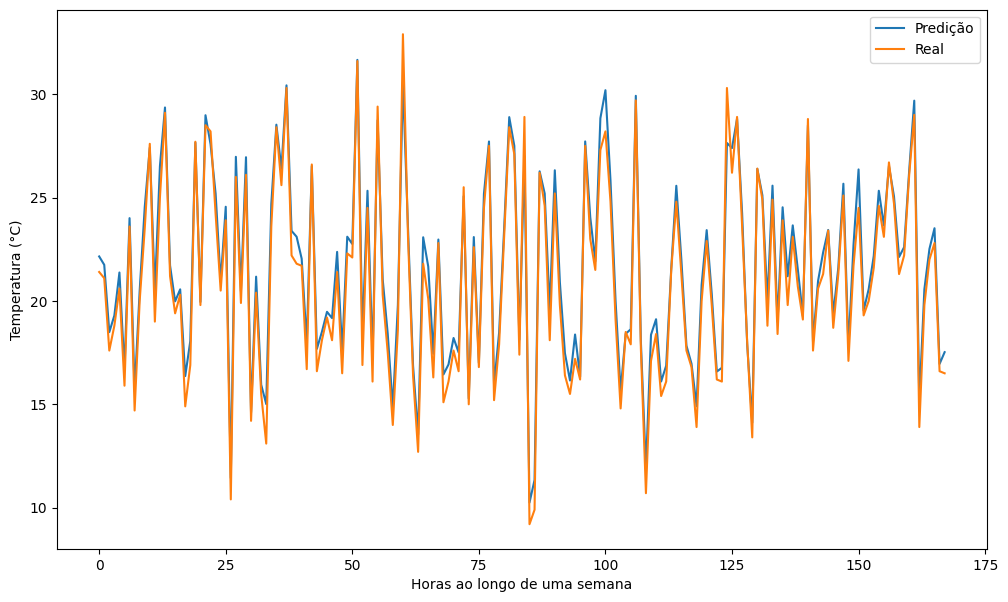

In [339]:
finaldataframe_2 = dataframe_predict_actual_2.reset_index(drop=True)

plt.figure(figsize=(12, 7))
plt.plot(finaldataframe_2['Previstos'][:168], label="Predição")
plt.plot(finaldataframe_2['Reais'][:168], label="Real")
plt.xlabel('Horas ao longo de uma semana')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()

# **Conclusões**

Para avaliar qual modelo está melhor ajustado, é necessário analisar os coeficientes de R², RMSE, MSE e MAE.

O modelo de regressão linear comum, com remoção de outliers, apresentou um R² muito alto, próximo de 1, o que indica que a variação da temperatura é bem explicada pelas variáveis independentes. Além disso, os valores de RMSE, MSE e MAE são baixos (RMSE: 0.0148, MSE: 0.00022, MAE: 0.0122), indicando que as previsões estão próximas dos valores reais.

Já o modelo de regressão interquartílica sem remoção de outliers apresentou um R² menor (0.96) e valores de RMSE e MSE bastante elevados (RMSE: 20.176, MSE: 0.00062). O valor de MAE é relativamente baixo (MAE: 0.021), porém não o suficiente para compensar os demais resultados.

Sendo assim, é possível concluir que o modelo de regressão linear com remoção de outliers está melhor ajustado, pois apresentou resultados mais precisos e um R² mais próximo de 1, indicando que as variáveis independentes possuem uma relação linear forte com a variável dependente (temperatura).

Como o modelo de regressão linear não considera os dados outliers, ele pode ser considerado realístico apenas se for possível justificar a remoção desses outliers com base em uma análise cuidadosa dos dados. A remoção de outliers pode ser justificada em alguns casos, como quando os outliers são causados por erros de medição ou problemas na coleta de dados. No entanto, se os outliers forem resultado de fenômenos reais, a remoção desses pontos pode levar a uma perda significativa de informação e a um modelo que não seja representativo dos dados reais. Nesse caso, um modelo de regressão interquartílica pode ser mais apropriado para capturar a relação entre as variáveis, mesmo que apresente um desempenho inferior em relação a algumas métricas de avaliação.

Como não conhecemos os dados obtidos por meio da API a fundo, não é possível afirmar se os dados outliers são originados, em sua maioria, por erros de coleta/medição ou fenômenos reais. Portanto, o modelo utilizando regressão interquartílica pode ser mais realístico, apesar do menor desempenho neste cenário.